<a href="https://colab.research.google.com/github/sp1667/Suryaprakashchary_INFO5502_SPRING2022/blob/main/Surya_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Loading data from the next csv file into another dataframe
countries_data = pd.read_csv('/content/countries of the world.csv')
countries_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
#Loading data from the second csv file into a dataframe
covid_data = pd.read_csv('/content/owid-covid-data.csv')
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
 #renaming the column 'location' to 'Country'
covid_data = covid_data.rename(columns = {'location' :'Country'}, inplace = False)

#creating a dataframe with only the columns I require
new_covid_data = covid_data[['Country','date','continent', 'population', 'gdp_per_capita', 'life_expectancy', 'male_smokers', 'female_smokers' ]]

#Grouping all values by the 'Country' column, choosing the first value from its multiple rows and then reseting the index
new_covid_data= new_covid_data.groupby('Country').first().reset_index()

#Removing the rows that have na/none in 'continent' column
new_covid_data=new_covid_data[new_covid_data['continent'].notna()].reset_index()

#dropping the index column
new_covid_data= new_covid_data.drop('index', axis=1)

#dropping the date column
new_covid_data= new_covid_data.drop('date', axis=1)

#removing spaces at the beginning and at the end
new_covid_data['Country'] = new_covid_data['Country'].str.strip()

In [6]:
new_covid_data.head()

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers
0,Afghanistan,Asia,41128772.0,1803.987,64.83,NaN,NaN
1,Albania,Europe,2842318.0,11803.431,78.57,51.2,7.1
2,Algeria,Africa,44903228.0,13913.839,76.88,30.4,0.7
3,American Samoa,Oceania,44295.0,NaN,73.74,NaN,NaN
4,Andorra,Europe,79843.0,NaN,83.73,37.8,29.0


In [7]:
#creating a dataframe with only the required columns
new_countries_data = countries_data[['Country', 'Region', 'Net migration', 'Literacy (%)']]
new_countries_data['Country'] = new_countries_data['Country'].str.strip()


<ipython-input-7-a7e5be66bc76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_countries_data['Country'] = new_countries_data['Country'].str.strip()


In [8]:
new_countries_data.head()

,Country,Region,Net migration,Literacy (%)
0,Afghanistan,ASIA (EX. NEAR EAST),"23,06","36,0"
1,Albania,EASTERN EUROPE,"-4,93","86,5"
2,Algeria,NORTHERN AFRICA,"-0,39","70,0"
3,American Samoa,OCEANIA,"-20,71","97,0"
4,Andorra,WESTERN EUROPE,"6,6","100,0"


In [9]:
total_covid_data = covid_data.groupby('Country').last()

In [10]:
#removing rows that have 0 life expectancy
total_covid_data = total_covid_data[total_covid_data['life_expectancy'] !=0].reset_index()

#creating a df with only the required columns
new_total_covid_data = total_covid_data[['Country','hospital_beds_per_thousand','total_cases', 'total_deaths', 'total_tests']]

In [12]:
new_total_covid_data.head()

,Country,hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,0.50,223846.0,7932.0,994894.0
1,Africa,NaN,13102443.0,258991.0,NaN
2,Albania,2.89,334090.0,3604.0,1613870.0
3,Algeria,1.90,271852.0,6881.0,230553.0
4,American Samoa,NaN,8332.0,34.0,NaN


In [13]:
#merging first and second dfs:
first_second = new_covid_data.merge(new_countries_data, on='Country')
#merging the result with the third dataframe:
my_df = first_second.merge(new_total_covid_data, on = 'Country')

In [14]:
my_df.head()

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,41128772.0,1803.987,64.83,NaN,NaN,ASIA (EX. NEAR EAST),"23,06","36,0",0.50,223846.0,7932.0,994894.0
1,Albania,Europe,2842318.0,11803.431,78.57,51.2,7.1,EASTERN EUROPE,"-4,93","86,5",2.89,334090.0,3604.0,1613870.0
2,Algeria,Africa,44903228.0,13913.839,76.88,30.4,0.7,NORTHERN AFRICA,"-0,39","70,0",1.90,271852.0,6881.0,230553.0
3,American Samoa,Oceania,44295.0,NaN,73.74,NaN,NaN,OCEANIA,"-20,71","97,0",NaN,8332.0,34.0,NaN
4,Andorra,Europe,79843.0,NaN,83.73,37.8,29.0,WESTERN EUROPE,"6,6","100,0",NaN,48015.0,159.0,300307.0


In [15]:
my_df["Literacy (%)"] = my_df["Literacy (%)"].str.replace(',', '.')
my_df

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,41128772.0,1803.987,64.83,NaN,NaN,ASIA (EX. NEAR EAST),"23,06",36.0,0.50,223846.0,7932.0,994894.0
1,Albania,Europe,2842318.0,11803.431,78.57,51.2,7.1,EASTERN EUROPE,"-4,93",86.5,2.89,334090.0,3604.0,1613870.0
2,Algeria,Africa,44903228.0,13913.839,76.88,30.4,0.7,NORTHERN AFRICA,"-0,39",70.0,1.90,271852.0,6881.0,230553.0
3,American Samoa,Oceania,44295.0,NaN,73.74,NaN,NaN,OCEANIA,"-20,71",97.0,NaN,8332.0,34.0,NaN
4,Andorra,Europe,79843.0,NaN,83.73,37.8,29.0,WESTERN EUROPE,"6,6",100.0,NaN,48015.0,159.0,300307.0
5,Angola,Africa,35588996.0,5819.495,61.15,NaN,NaN,SUB-SAHARAN AFRICA,0,42.0,NaN,105384.0,1934.0,1618566.0
6,Anguilla,North America,15877.0,NaN,81.88,NaN,NaN,LATIN AMER. & CARIB,"10,76",95.0,NaN,3904.0,12.0,51382.0
7,Argentina,South America,45510324.0,18933.907,76.67,27.7,16.2,LATIN AMER. & CARIB,"0,61",97.1,5.00,10044957.0,130472.0,36663990.0
8,Armenia,Asia,2780472.0,8787.580,75.09,52.1,1.5,C.W. OF IND. STATES,"-6,47",98.6,4.20,449263.0,8751.0,3102267.0
9,Aruba,North America,106459.0,35973.781,76.29,NaN,NaN,LATIN AMER. & CARIB,0,97.0,NaN,44224.0,292.0,793.0


EXPLORATORY DATA ANALYSIS(EDA)

In [16]:
list(my_df.columns.values)

['Country',
 'continent',
 'population',
 'gdp_per_capita',
 'life_expectancy',
 'male_smokers',
 'female_smokers',
 'Region',
 'Net migration',
 'Literacy (%)',
 'hospital_beds_per_thousand',
 'total_cases',
 'total_deaths',
 'total_tests']

In [17]:
my_df.shape

(15, 14)

In [18]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     15 non-null     object 
 1   continent                   15 non-null     object 
 2   population                  15 non-null     float64
 3   gdp_per_capita              12 non-null     float64
 4   life_expectancy             15 non-null     float64
 5   male_smokers                10 non-null     float64
 6   female_smokers              10 non-null     float64
 7   Region                      15 non-null     object 
 8   Net migration               15 non-null     object 
 9   Literacy (%)                15 non-null     object 
 10  hospital_beds_per_thousand  10 non-null     float64
 11  total_cases                 15 non-null     float64
 12  total_deaths                15 non-null     float64
 13  total_tests                 14 non-nu

In [19]:
my_df.describe()

,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,hospital_beds_per_thousand,total_cases,total_deaths,total_tests
count,1.500000e+01,12.000000,15.000000,10.000000,10.000000,10.00000,1.500000e+01,15.000000,1.400000e+01
mean,2.607562e+07,20815.293667,75.779333,37.140000,10.300000,3.32000,2.076461e+06,14895.733333,2.339234e+07
std,4.394949e+07,16777.123851,6.330615,11.093061,11.085426,2.11924,3.853969e+06,32791.052960,5.207924e+07
min,1.587700e+04,1803.987000,61.150000,16.500000,0.300000,0.50000,3.904000e+03,12.000000,7.930000e+02
25%,7.893480e+05,8045.558750,73.370000,30.525000,1.125000,1.92500,7.669950e+04,914.000000,4.739538e+05
50%,8.939617e+06,14880.629000,76.670000,37.700000,6.450000,3.36500,3.340900e+05,6807.000000,2.227906e+06
75%,3.835888e+07,37803.012000,80.055000,44.150000,15.400000,4.57500,7.642985e+05,9519.500000,9.213766e+06
max,1.711864e+08,45436.686000,83.730000,52.100000,29.000000,7.37000,1.152729e+07,130472.000000,1.897917e+08


In [20]:
#Calculating average life expectancy using weighted average formula:

prod_le = my_df['population']*my_df['life_expectancy']
avg_le = prod_le.sum()/my_df['population'].sum()
print("\n The average life expectancy of the countries is {:.2f} ".format(avg_le))


 The average life expectancy of the countries is 72.72 


In [21]:
print("The sum total upto June 9th, 2021 is {}, out of which {} people have died. The total tests conducted is {}".format(my_df['total_cases'].sum(), my_df['total_deaths'].sum(), my_df['total_tests'].sum()))

The sum total upto June 9th, 2021 is 31146919.0, out of which 223436.0 people have died. The total tests conducted is 327492785.0


In [22]:
#locating the country with the highest deaths and cases:

chc = my_df.loc[my_df['total_cases']==my_df['total_cases'].max(), 'Country'].item()
chd = my_df.loc[my_df['total_deaths']==my_df['total_deaths'].max(), 'Country'].item()

print("The country with the highest number of cases is {} with {} cases, and that with the highest number of deaths is {} with {} deaths".format(chc, my_df['total_cases'].max(), chd, my_df['total_deaths'].max()))

The country with the highest number of cases is Australia with 11527289.0 cases, and that with the highest number of deaths is Argentina with 130472.0 deaths


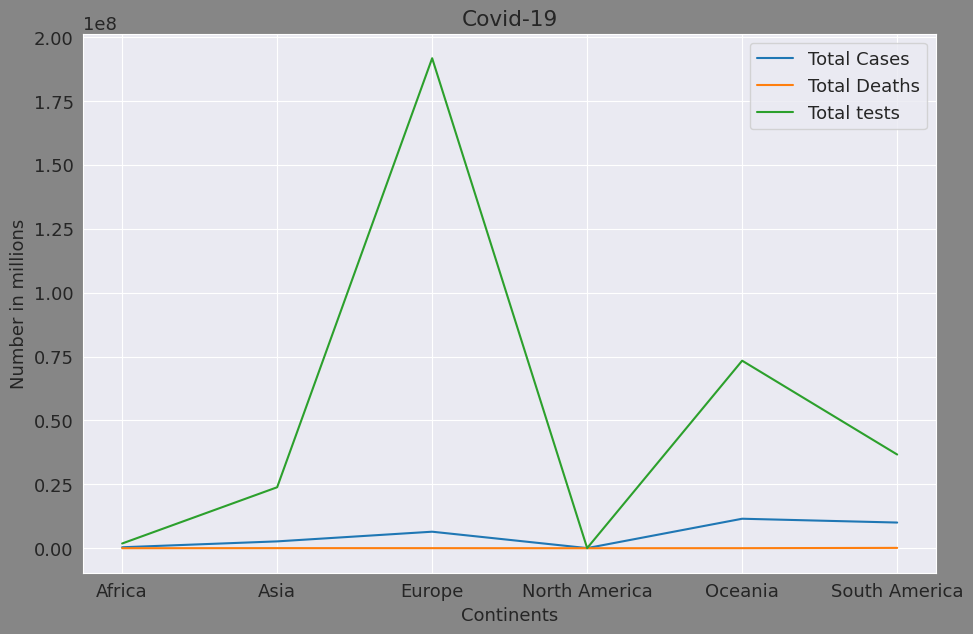

In [23]:
#configuring some styles first:

sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize'] = (11,7)
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.facecolor'] = '#0f0f0f80'
my_df_cont = my_df.groupby('continent')[['total_cases', 'total_deaths', 'total_tests', 'population']].sum().reset_index()
#plotting a line chart to compare total tests, deaths and cases across the continents

plt.plot(my_df_cont['continent'], my_df_cont['total_cases'])
plt.plot(my_df_cont['continent'], my_df_cont['total_deaths'])
plt.plot(my_df_cont['continent'], my_df_cont['total_tests'])

plt.xlabel('Continents')
plt.ylabel('Number in millions')
plt.title('Covid-19')
plt.legend(['Total Cases', 'Total Deaths', 'Total tests'])

<Axes: title={'center': 'Bar Plot'}, xlabel='Country', ylabel='total_tests'>

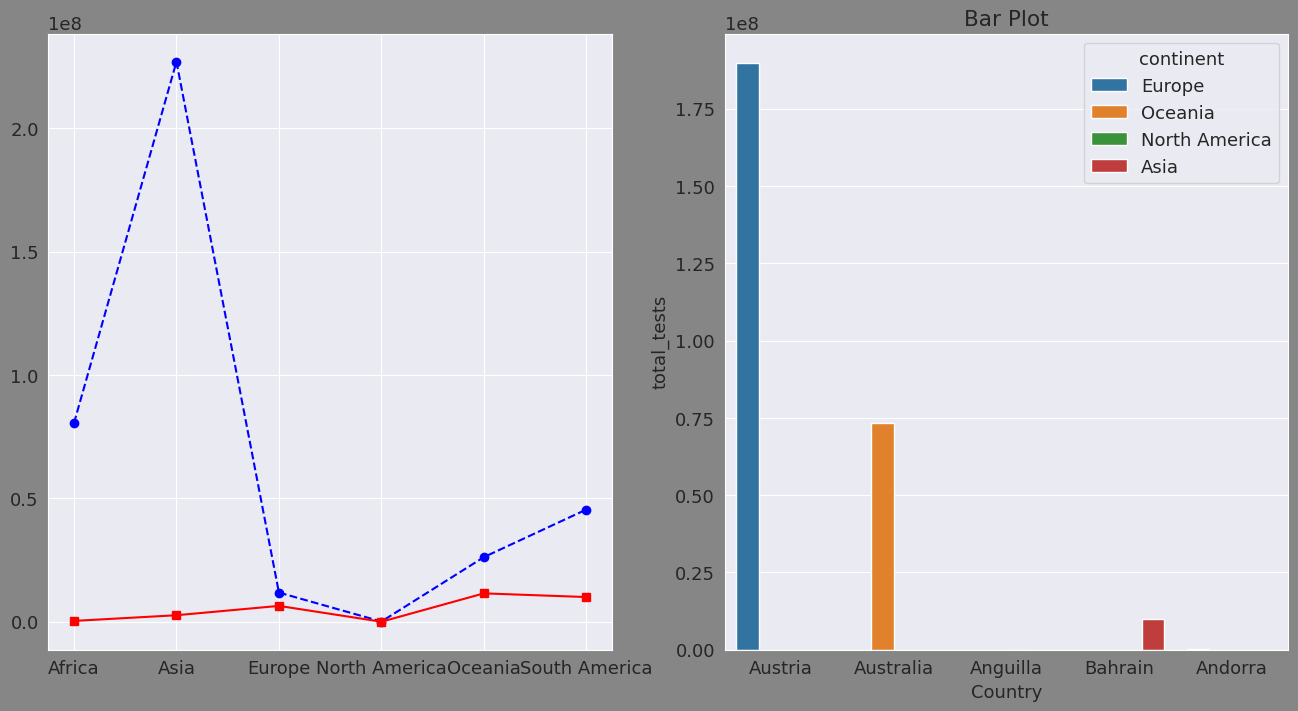

In [24]:
fig, axes = plt.subplots(1,2, figsize= (16,8))

#For axes(0)
axes[0].plot(my_df_cont['continent'], my_df_cont['population'], 'o--b')
axes[0].plot(my_df_cont['continent'], my_df_cont['total_cases'], 's-r')

plt.xlabel('Continents')
plt.ylabel('Number in millions')
plt.title('Population vs Total Cases')
plt.legend(['Population', 'Total Cases'])

#For axes(1)
#10 random countries from 25 countries with the highest death rate
my_df_3 = my_df.sort_values('total_deaths', ascending = False).head(25).sample(10)
axes[1].set_title('Bar Plot')
sns.barplot(x='Country', y='total_tests', hue='continent', data= my_df_3.sample(5), ax=axes[1])

HYPOTHESIS

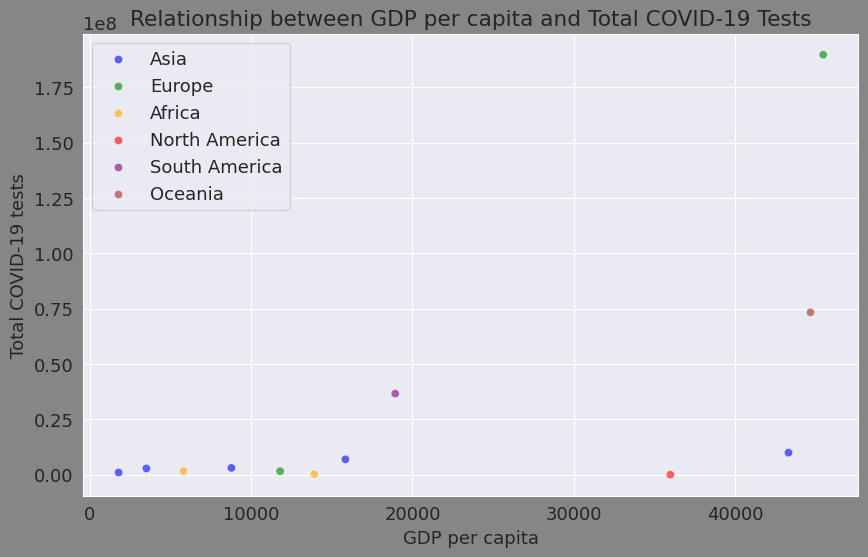

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
x = my_df['gdp_per_capita']
y = my_df['total_tests']
continent_colors = {
    'Asia': 'blue',
    'Europe': 'green',
    'Africa': 'orange',
    'North America': 'red',
    'South America': 'purple',
    'Oceania': 'brown'
}
continent_col = my_df['continent'].map(continent_colors)
plt.scatter(x, y, c=continent_col, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.xlabel('GDP per capita')
plt.ylabel('Total COVID-19 tests')
plt.title('Relationship between GDP per capita and Total COVID-19 Tests')
for continent, color in continent_colors.items():
    plt.scatter([], [], c=color, label=continent, alpha=0.6, edgecolors='w', linewidth=0.5)

plt.legend()
plt.show()


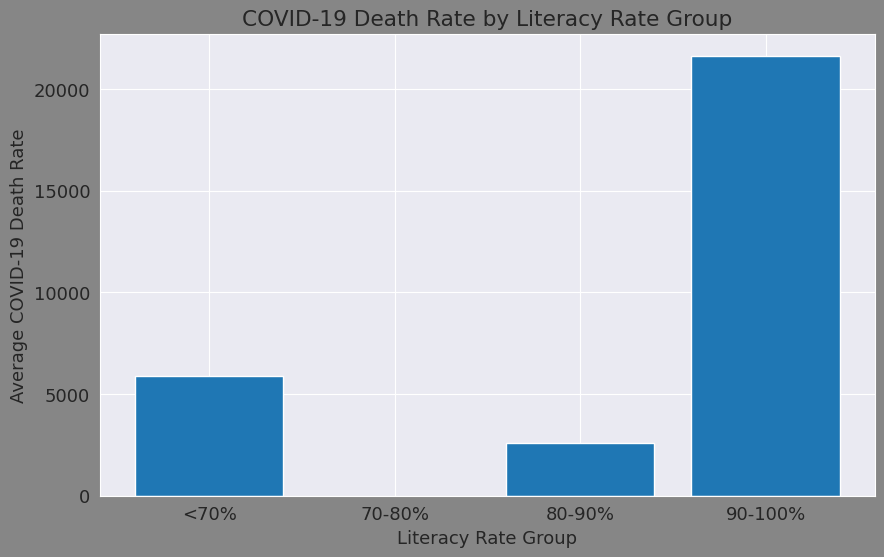

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Literacy (%)' column to numeric
my_df['Literacy (%)'] = pd.to_numeric(my_df['Literacy (%)'], errors='coerce')
# Drop rows with NaN values in 'Literacy (%)'
my_df = my_df.dropna(subset=['Literacy (%)'])
# Define literacy rate groups
bins = [0, 70, 80, 90, 100]
# Categorize countries into different literacy rate groups
my_df['Literacy_Group'] = pd.cut(my_df['Literacy (%)'], bins=bins, labels=['<70%', '70-80%', '80-90%', '90-100%'])
# Calculate average death rate for each literacy rate group
average_death_rates = my_df.groupby('Literacy_Group')['total_deaths'].mean()
# Create a bar chart
plt.figure(figsize=(10, 6))
# Plot the bar chart
plt.bar(average_death_rates.index, average_death_rates.values)
# Set labels and title
plt.xlabel('Literacy Rate Group')
plt.ylabel('Average COVID-19 Death Rate')
plt.title('COVID-19 Death Rate by Literacy Rate Group')
# Show the plot
plt.show()


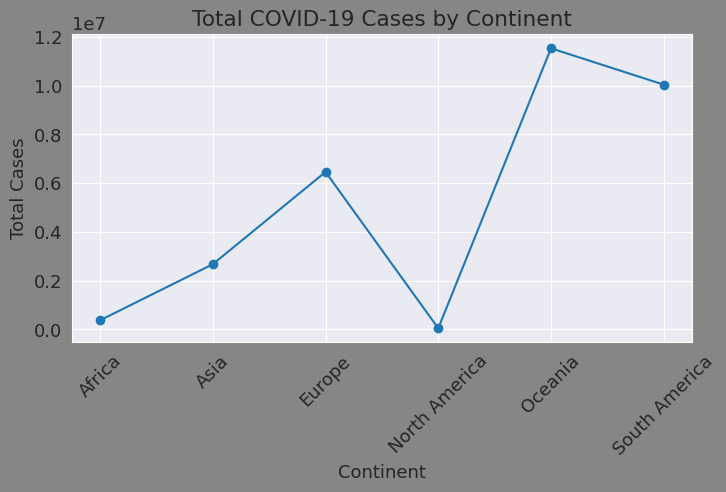

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the data by continent and calculate the total cases for each continent
total_cases_by_continent = my_df.groupby('continent')['total_cases'].sum()
# Plot the line chart
plt.figure(figsize=(8, 4))
total_cases_by_continent.plot(kind='line', marker='o', linestyle='-')
plt.title('Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
